In [1]:
from src.ocsmm.OneClassSMMClassifier import OneClassSMMClassifier
import numpy as np
import matplotlib.pyplot as plt

In [2]:

def generate_compact_dataset():
    # Set the mean for normal groups (same for all normal groups)
    np.random.seed(20) 
    mean_normal = np.array([0, 0])

    base_cov_normal =  [[1.1, 1], [1, 1.1]]

    angle_rad = np.radians(90)

    # Create the rotation matrix for 2D
    rotation_matrix = np.array([[np.cos(angle_rad), -np.sin(angle_rad)],
                                [np.sin(angle_rad), np.cos(angle_rad)]])

    # Set the mean for outlier groups (far from the normal groups)
    mean_outlier = np.array([5, 10])

    # Covariance matrix for outliers (wider spread)
    cov_matrix_rot = rotation_matrix @ base_cov_normal @ rotation_matrix.T

    # Generate 18 normal groups with different variances
    normal_groups = []
    for i in range(18):
        data_normal = np.random.multivariate_normal(mean_normal, base_cov_normal, 20)
        normal_groups.append((data_normal))

    # Generate 2 outlier groups with a different covariance (wider spread)
    outlier_group_1 = np.random.multivariate_normal(mean_normal, cov_matrix_rot, 20)
    outlier_group_2 = np.random.multivariate_normal(mean_normal+[5,0], cov_matrix_rot, 20)

    # Combine all groups
    all_groups = normal_groups + [(outlier_group_1), (outlier_group_2)]

    return all_groups

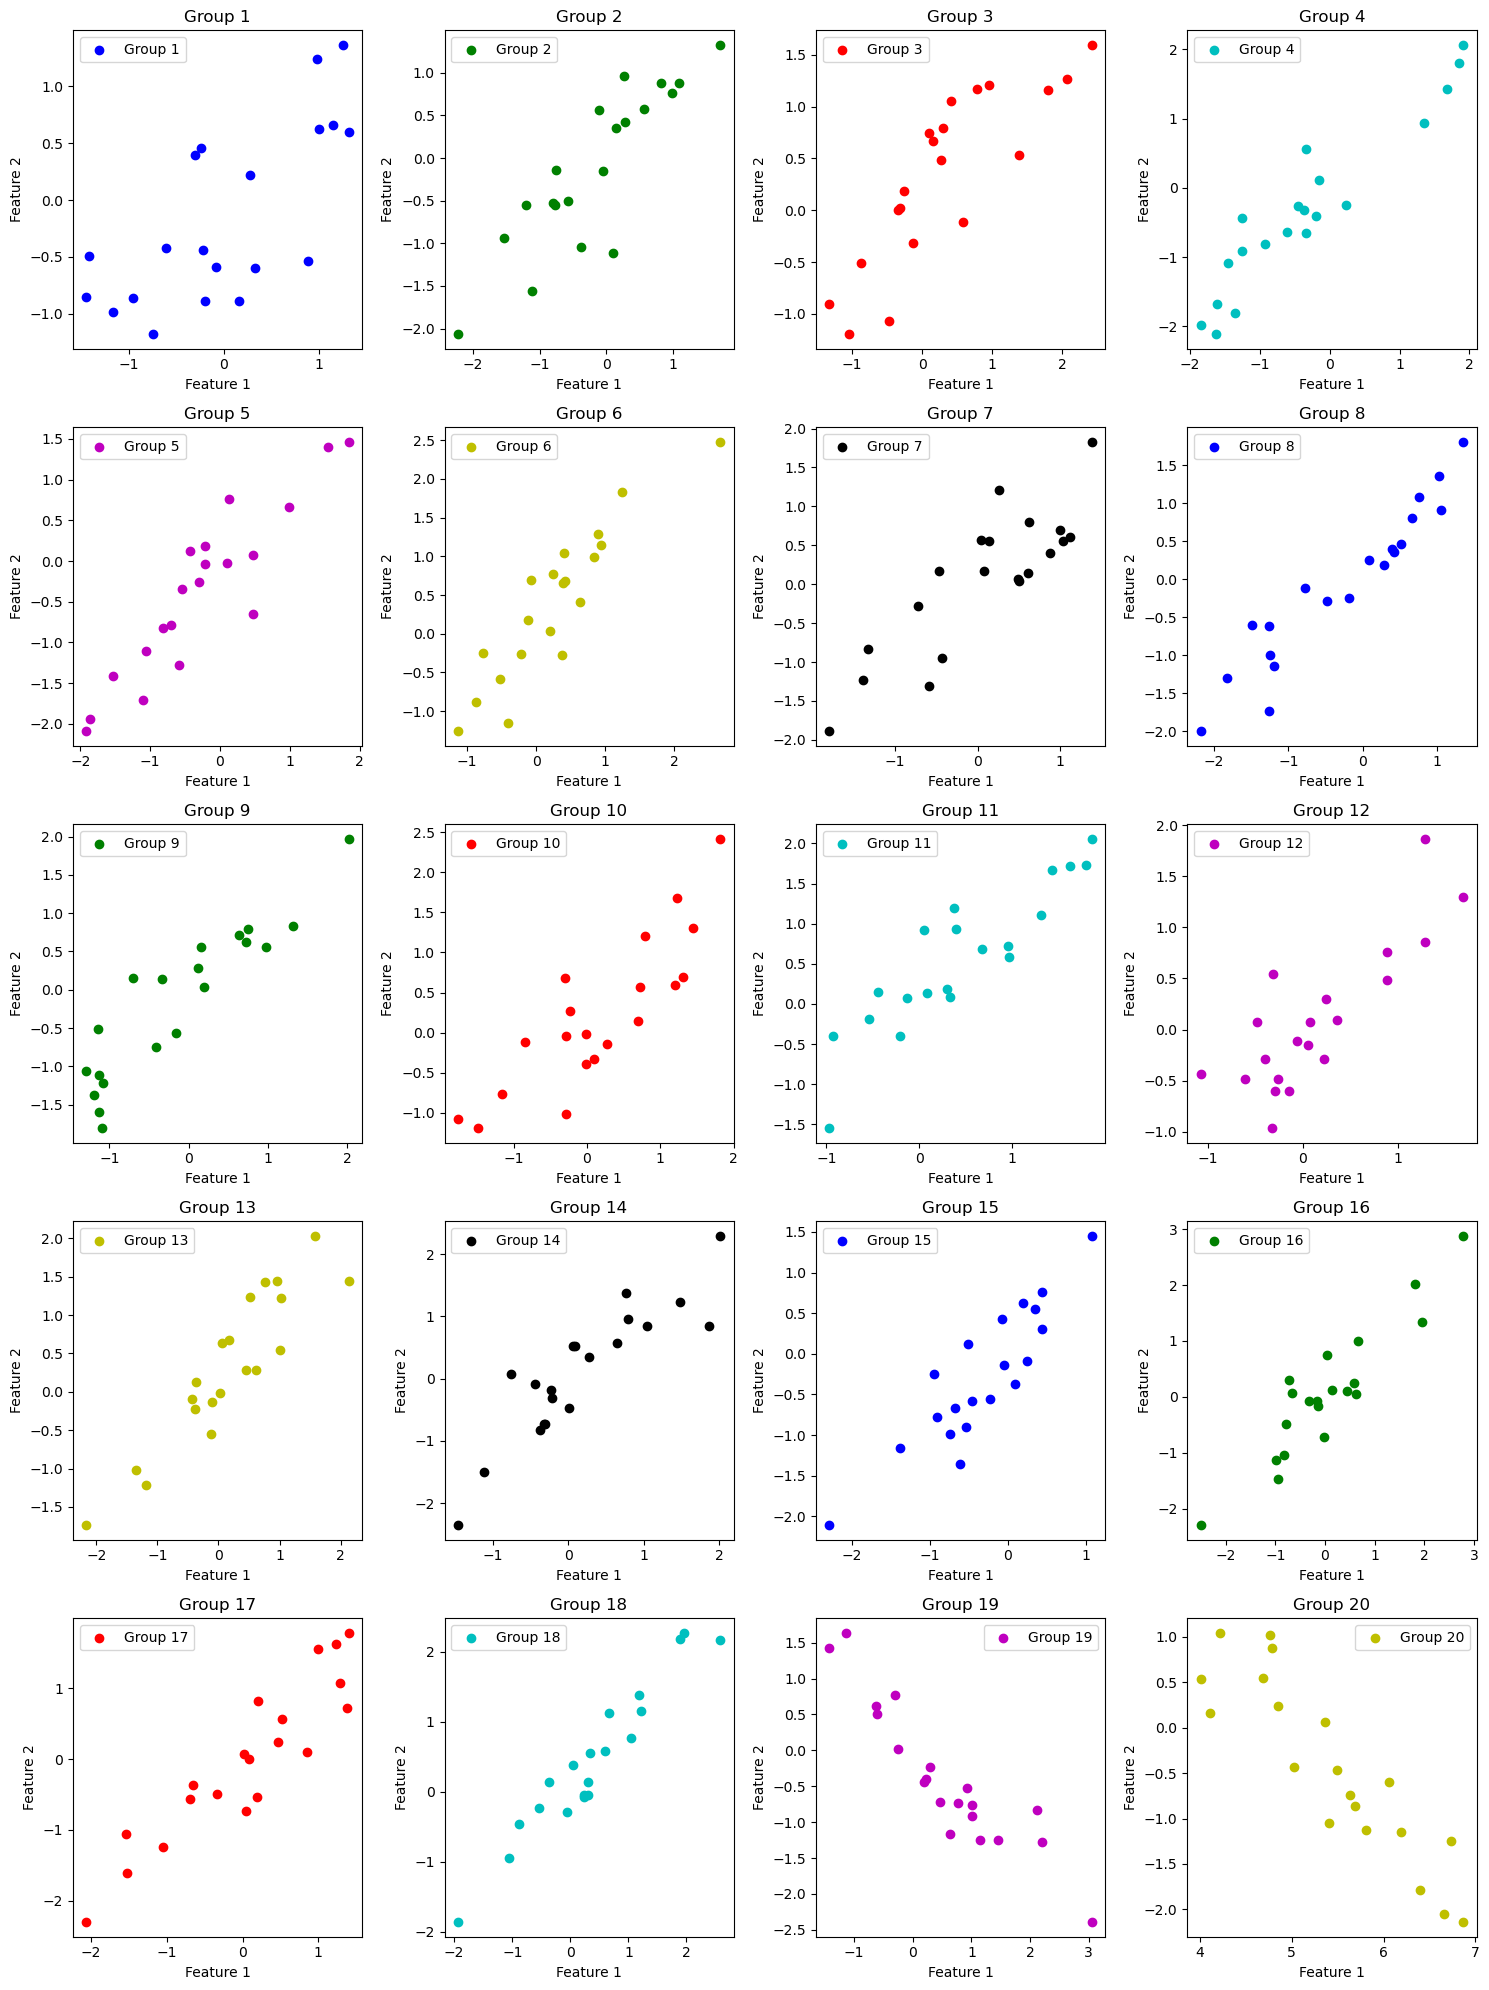

<Figure size 640x480 with 0 Axes>

In [3]:
def plot_all_groups_subplots(groups):
    # Create a figure with 5 rows and 4 columns (to fit 20 subplots)
    fig, axes = plt.subplots(5, 4, figsize=(15, 20))
    
    # Flatten axes array to easily index it
    axes = axes.flatten()

    # Different colors for each group
    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k'] * 3  # Repeat colors for 20 groups
    
    for idx, (group, ax) in enumerate(zip(groups, axes)):
        ax.scatter(group[:, 0], group[:, 1], color=colors[idx], label=f"Group {idx + 1}")
        ax.set_title(f"Group {idx + 1}")
        ax.set_xlabel("Feature 1")
        ax.set_ylabel("Feature 2")
        ax.legend()

    plt.tight_layout()  # Adjust layout to avoid overlap
    plt.show()
    plt.savefig("dataset.pdf")

# Generate the dataset
datasets = generate_compact_dataset()

# Plot all groups on different subplots
plot_all_groups_subplots(datasets)

In [4]:
datasets

[array([[-0.94951767, -0.86192417],
        [ 0.15760338, -0.8903352 ],
        [ 0.98647072,  1.23677451],
        [-0.7438746 , -1.18146463],
        [-0.60639789, -0.42464382],
        [-0.22111888, -0.44177893],
        [ 0.9999349 ,  0.62321651],
        [ 1.2561565 ,  1.36604366],
        [-0.3052471 ,  0.39581949],
        [-1.16793263, -0.98619915],
        [ 0.88605006, -0.5404284 ],
        [-1.44581228, -0.84977574],
        [ 0.27842379,  0.22027228],
        [-0.2362643 ,  0.45968343],
        [ 0.33022524, -0.59414233],
        [ 1.15435196,  0.66036899],
        [-1.41649733, -0.49530977],
        [ 1.3187019 ,  0.59735075],
        [-0.19324908, -0.88692241],
        [-0.08361811, -0.59188823]]),
 array([[ 0.27507841,  0.41862091],
        [ 0.2717703 ,  0.96259382],
        [-0.79566004, -0.53036524],
        [-0.7524524 , -0.14523069],
        [-1.53652759, -0.93198596],
        [ 0.09909175, -1.11033716],
        [ 0.56855883,  0.56923348],
        [-1.2094536 , -0.5

In [5]:
classifier = OneClassSMMClassifier(nu=0.2)
classifier.fit(datasets)
# classifier = OneClassSMM(0.1, 0.5)

In [6]:
decision, y_pred = classifier.predict(datasets)

In [7]:
decision

array([ 0.7707775 ,  0.60069226,  0.36752841,  0.30225082,  0.62072034,
        0.65015895,  0.44741126,  0.30225064,  0.30225112,  0.7632328 ,
        0.38692039,  0.76853612,  0.42019748,  0.41221957,  0.84723463,
        0.50967614,  0.6666047 ,  0.30225078, -0.00453965, -1.20446955])

In [8]:
y_pred

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1., -1., -1.])

In [9]:
outlier_indices = [i for i, value in enumerate(y_pred) if value == -1]
outlier_indices

[18, 19]

In [10]:
# tensor_datasets = torch.tensor(datasets)
# tensor_datasets

In [11]:
from src.explanation_algorithms.OCSMMSHAP import OCSMMSHAP
ocsmm_shap = OCSMMSHAP(X=datasets, classifier=classifier, decision=decision)
ocsmm_shap.fit_ocsmmshap(X=datasets, num_coalitions=2**datasets[0].shape[1])

c:\Users\swath\Documents\CISPA\OCSVM-SHAP\src\utils\shapley_procedure\coalitions.py:19: RuntimeWarning: divide by zero encountered in log2
  set_to_1 = np.floor(np.log2(rest)).astype(int)
c:\Users\swath\Documents\CISPA\OCSVM-SHAP\src\utils\shapley_procedure\coalitions.py:19: RuntimeWarning: invalid value encountered in cast
  set_to_1 = np.floor(np.log2(rest)).astype(int)
c:\Users\swath\Documents\CISPA\OCSVM-SHAP\src\utils\shapley_procedure\coalitions.py:19: RuntimeWarning: invalid value encountered in log2
  set_to_1 = np.floor(np.log2(rest)).astype(int)
100%|██████████| 3/3 [00:00<00:00, 142.17it/s]


In [12]:
mean_stochastic_shapley_values = ocsmm_shap.return_deterministic_shapley_values()

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at C:\cb\pytorch_1000000000000\work\aten\src\ATen\native\TensorShape.cpp:3618.)


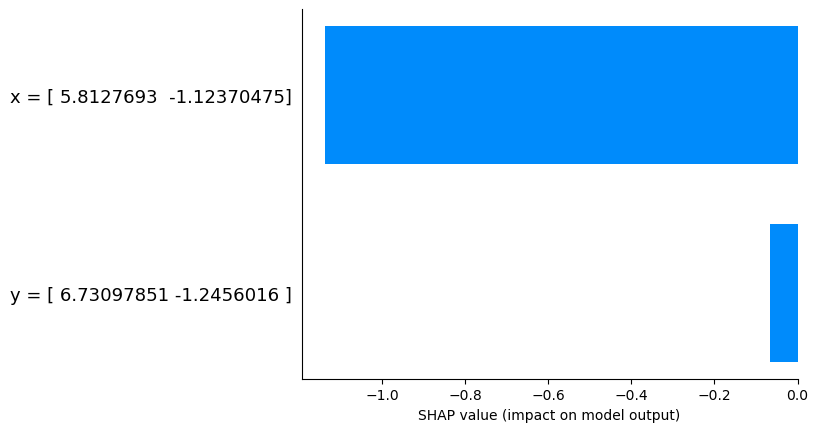

In [13]:
from src.utils.visualisation.deterministic_values import summary_plot, bar_plot, violin_plot
bar_plot(mean_stochastic_shapley_values.T[19], datasets[19], feature_names=['x', 'y'])

Group 20 (index 19) is not only rotated by 90 degrees it also has its mean shifted by 5 points in the x direction. This shift is contributing the most and the feature x is identified as the modt influential featrue. 

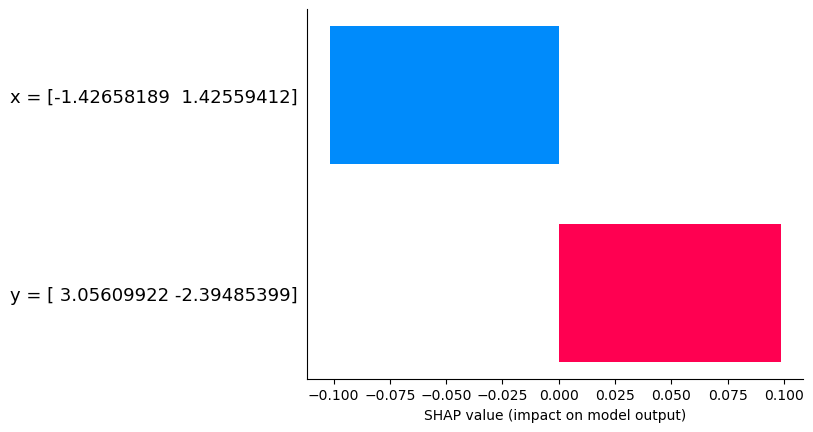

In [14]:
bar_plot(mean_stochastic_shapley_values.T[18], datasets[18], feature_names=['x', 'y'])

This group has its axis tilted, but the data is still centered at [0,0], so the influence of both are features are almost the same.

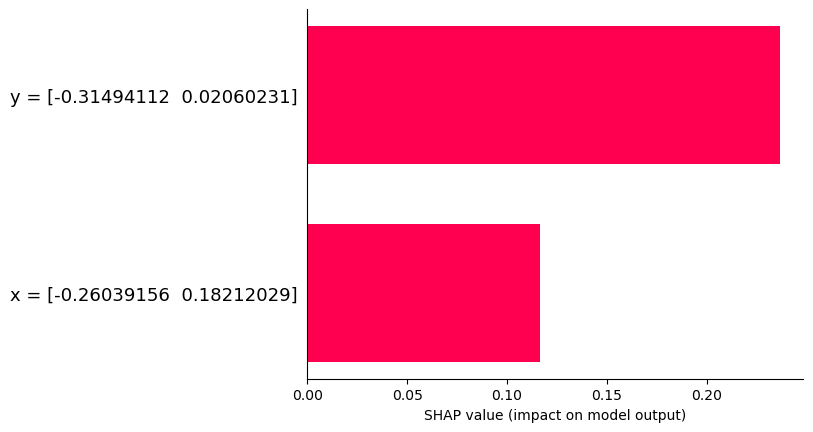

In [15]:
bar_plot(mean_stochastic_shapley_values.T[2], datasets[2], feature_names=['x', 'y'])

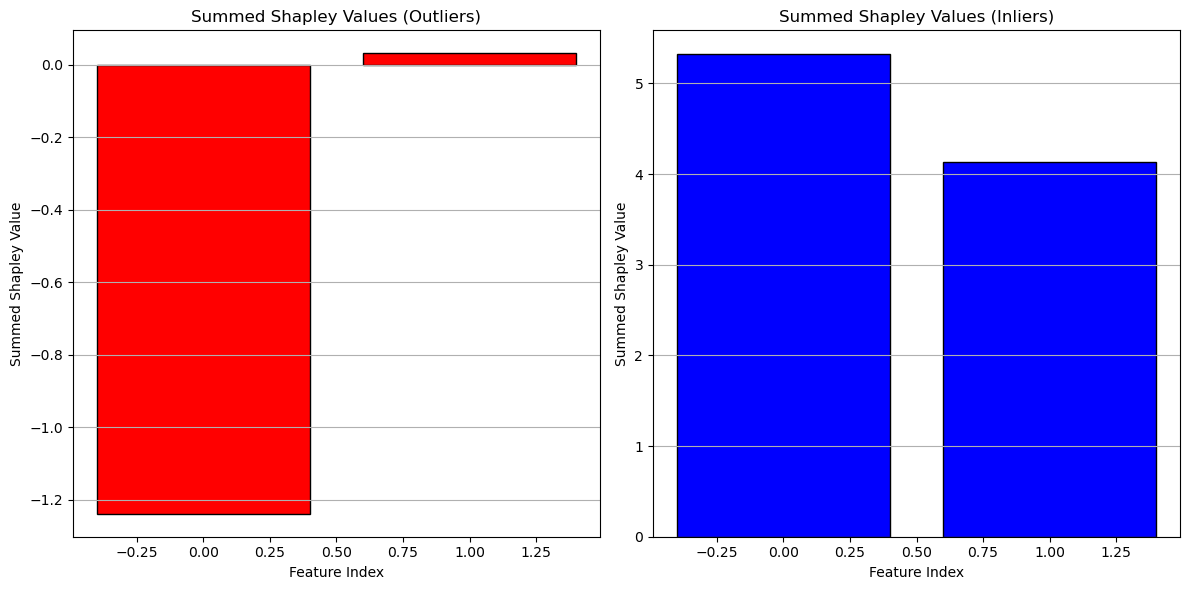

In [16]:
inlier_indices = [i for i in range(mean_stochastic_shapley_values.shape[1]) if i not in outlier_indices]

summed_outlier_shapley = mean_stochastic_shapley_values[:, outlier_indices].sum(dim=1).numpy()
summed_inlier_shapley = mean_stochastic_shapley_values[:, inlier_indices].sum(dim=1).numpy()

# Plot histogram
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Outlier Shapley Values
ax[0].bar(range(len(summed_outlier_shapley)), summed_outlier_shapley, color='red', edgecolor='black')
ax[0].set_title('Summed Shapley Values (Outliers)')
ax[0].set_xlabel('Feature Index')
ax[0].set_ylabel('Summed Shapley Value')
ax[0].grid(True, axis='y')

# Inlier Shapley Values
ax[1].bar(range(len(summed_inlier_shapley)), summed_inlier_shapley, color='blue', edgecolor='black')
ax[1].set_title('Summed Shapley Values (Inliers)')
ax[1].set_xlabel('Feature Index')
ax[1].set_ylabel('Summed Shapley Value')
ax[1].grid(True, axis='y')

plt.tight_layout()
plt.show()

The outliers are moving the decision towards the negative direction, hence their influence is negative.